In [1]:
# Quantium chips
# task1
import pandas as pd
import matplotlib.pyplot as plt
df_tran = pd.read_excel('QVI_transaction_data.xlsx', sheet_name='in')

In [2]:
# transaction data
df_tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
df_beha = pd.read_csv('QVI_purchase_behaviour.csv')

In [4]:
# purchase behaviour data
df_beha.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
# convert date
df_tran['DATE_CONV'] = pd.to_datetime(df_tran['DATE'], unit='D', origin='1899-12-30')

In [6]:
df_tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_CONV
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18


In [7]:
# check null values
df_tran.isnull().values.any()

False

In [8]:
df_beha.isnull().values.any()

False

In [9]:
# check zero values
df_tran.eq(0).any().any()

False

In [10]:
df_beha.eq(0).any().any()

False

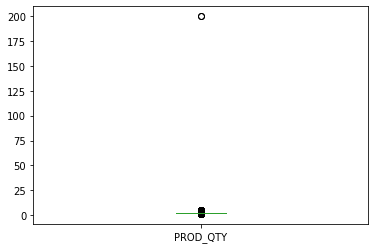

In [11]:
# check for outliers
df_tran['PROD_QTY'].plot.box()
plt.show()

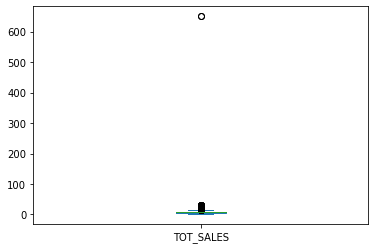

In [12]:
df_tran['TOT_SALES'].plot.box()
plt.show()

In [13]:
# remove outliers
df_tran = df_tran.loc[df_tran['PROD_QTY']!=df_tran['PROD_QTY'].max()]

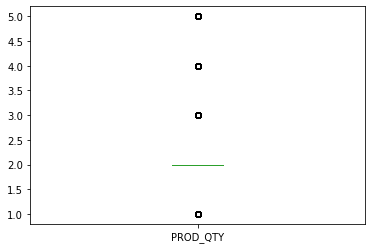

In [14]:
# replot box plots to check outliers
df_tran['PROD_QTY'].plot.box()
plt.show()

In [15]:
df_tran.shape

(264834, 9)

In [16]:
# calcualte unit price = total price / quantity
df_tran['PRICE_EACH'] = df_tran['TOT_SALES']/df_tran['PROD_QTY']
df_tran

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_CONV,PRICE_EACH
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,3.00
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,2.10
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,1.45
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,3.00
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,4.60
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09,5.40
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13,4.40
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06,4.40
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27,3.90


In [17]:
# join transaction dataset and behaviour dataset
df_all = pd.merge(df_tran,df_beha)
df_all

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_CONV,PRICE_EACH,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,3.00,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,2.10,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,2018-11-10,1.90,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,2019-03-09,2.10,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,1.45,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09,5.40,YOUNG SINGLES/COUPLES,Premium
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13,4.40,YOUNG SINGLES/COUPLES,Premium
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06,4.40,YOUNG SINGLES/COUPLES,Premium
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27,3.90,YOUNG SINGLES/COUPLES,Premium


In [18]:
# check for null (any transaction not linked to a loyalty card)
df_all.isnull().values.any()

False

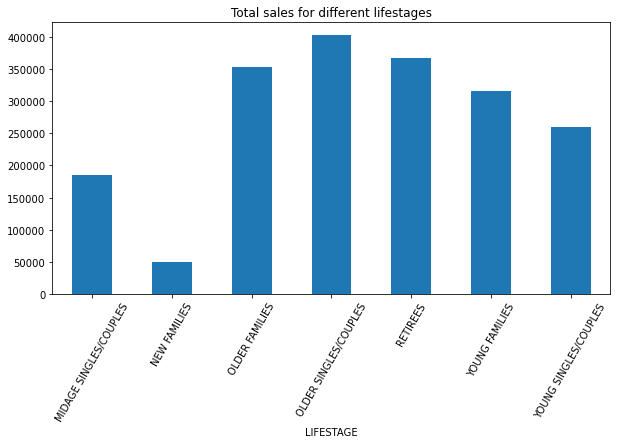

In [19]:
# total sales for different lifestage
plt.figure(figsize=(10, 5))
df_all.groupby('LIFESTAGE')['TOT_SALES'].sum().plot.bar(rot=60)
plt.title('Total sales for different lifestages')
plt.show()

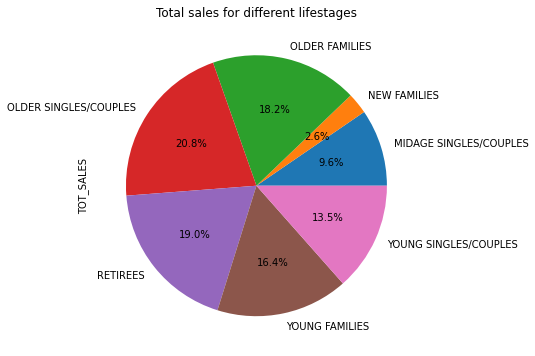

In [20]:
# total sales precentage for different lifestage
df_all.groupby('LIFESTAGE')['TOT_SALES'].sum().plot.pie(figsize=(6,6),autopct='%1.1f%%')
plt.title('Total sales for different lifestages')
plt.show()

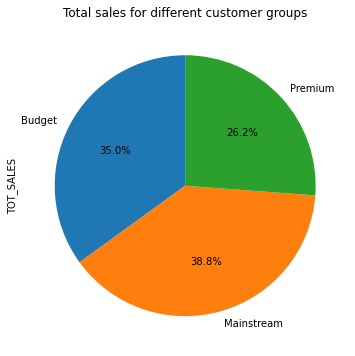

In [21]:
# total sales precentage for different customer group
df_all.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().plot.pie(figsize=(6,6),autopct='%1.1f%%',startangle=90)
plt.title('Total sales for different customer groups')
plt.show()

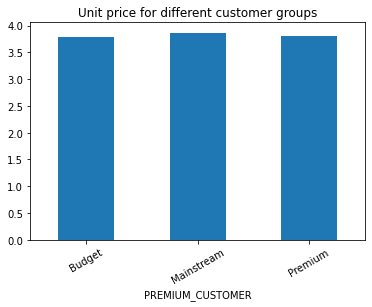

In [22]:
# unit price for different customer groups
df_all.groupby('PREMIUM_CUSTOMER')['PRICE_EACH'].mean().plot.bar(rot=30)
plt.title('Unit price for different customer groups')
plt.show()

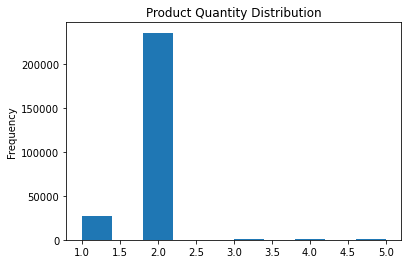

In [23]:
# quantity distribution
df_all['PROD_QTY'].plot.hist()
plt.title('Product Quantity Distribution')
plt.show()

LIFESTAGE
MIDAGE SINGLES/COUPLES    AxesSubplot(0.125,0.125;0.775x0.755)
NEW FAMILIES              AxesSubplot(0.125,0.125;0.775x0.755)
OLDER FAMILIES            AxesSubplot(0.125,0.125;0.775x0.755)
OLDER SINGLES/COUPLES     AxesSubplot(0.125,0.125;0.775x0.755)
RETIREES                  AxesSubplot(0.125,0.125;0.775x0.755)
YOUNG FAMILIES            AxesSubplot(0.125,0.125;0.775x0.755)
YOUNG SINGLES/COUPLES     AxesSubplot(0.125,0.125;0.775x0.755)
Name: PROD_QTY, dtype: object

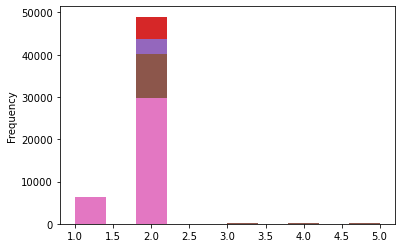

In [24]:
# quantity distribution for different lifestages
df_all.groupby('LIFESTAGE')['PROD_QTY'].plot.hist()

In [25]:
# quantity distribution for different lifestages
grouped = df_all.groupby('LIFESTAGE')['PROD_QTY']

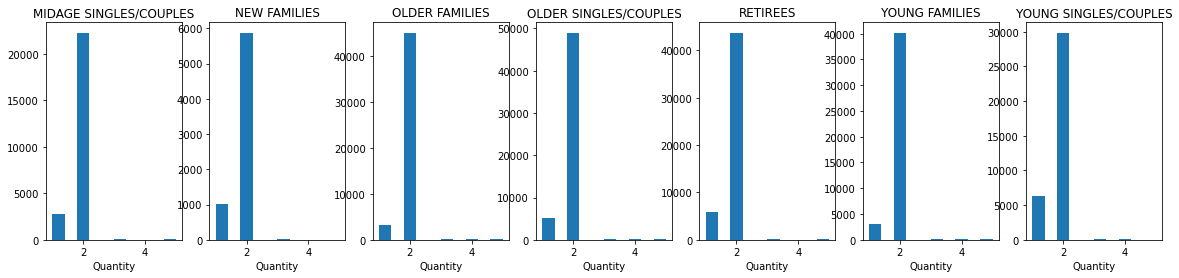

In [26]:
rowlength = grouped.ngroups                         # fix up if odd number of groups
fig, axs = plt.subplots(figsize=(20,4), 
                        nrows=1, ncols=rowlength     # fix as above
                        ) # Much control of gridspec

targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    ax.hist(grouped.get_group(key))
    ax.set_title(key)
    ax.set_xlabel('Quantity')
plt.show()

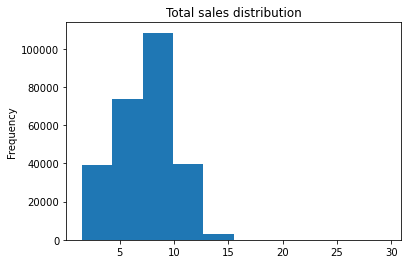

In [27]:
# total sales distribution
df_all['TOT_SALES'].plot.hist()
plt.title('Total sales distribution')
plt.show()

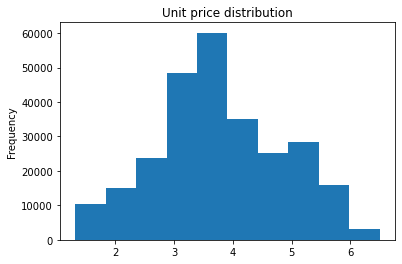

In [28]:
# unit price distribution
df_all['PRICE_EACH'].plot.hist()
plt.title('Unit price distribution')
plt.show()

In [29]:
# time factor, day of the week
df_tran['dayofweek'] = df_tran['DATE_CONV'].dt.dayofweek

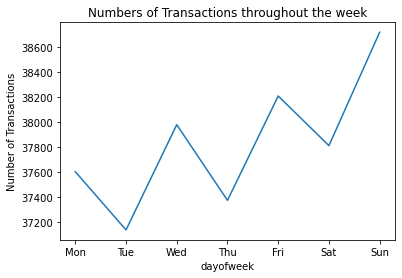

In [30]:
# number of transcation for each day of the week
df_tran.groupby('dayofweek').size().plot()
plt.xticks(range(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylabel('Number of Transactions')
plt.title('Numbers of Transactions throughout the week')
plt.show()

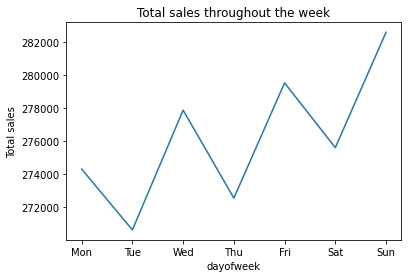

In [31]:
# total sales for each day of the week
df_tran.groupby('dayofweek').sum()['TOT_SALES'].plot()
plt.xticks(range(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylabel('Total sales')
plt.title('Total sales throughout the week')
plt.show()

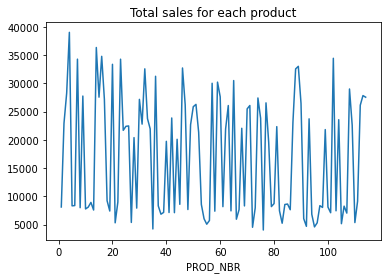

In [32]:
# total sales for each product
df_all.groupby('PROD_NBR')['TOT_SALES'].sum().plot()
plt.title('Total sales for each product')
plt.show()

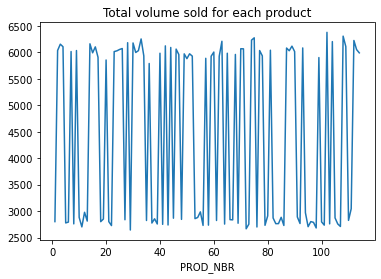

In [33]:
# total volume sold for each product
df_all.groupby('PROD_NBR')['PROD_QTY'].sum().plot()
plt.title('Total volume sold for each product')
plt.show()

In [34]:
# get the brand name (first word)
df_tran['BRAND'] = df_tran['PROD_NAME'].str.split(' ').str[0]

In [35]:
df_tran

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_CONV,PRICE_EACH,dayofweek,BRAND
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,3.00,2,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,2.10,1,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,1.45,0,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,3.00,4,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,4.60,5,Kettle
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09,5.40,5,Kettle
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13,4.40,0,Tostitos
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06,4.40,1,Doritos
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27,3.90,3,Doritos


In [36]:
df_all['BRAND'] = df_all['PROD_NAME'].str.split(' ').str[0]
df_all

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_CONV,PRICE_EACH,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,3.00,YOUNG SINGLES/COUPLES,Premium,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,2.10,MIDAGE SINGLES/COUPLES,Budget,CCs
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,2018-11-10,1.90,MIDAGE SINGLES/COUPLES,Budget,WW
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,2019-03-09,2.10,MIDAGE SINGLES/COUPLES,Budget,CCs
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,1.45,MIDAGE SINGLES/COUPLES,Budget,Smiths
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09,5.40,YOUNG SINGLES/COUPLES,Premium,Kettle
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13,4.40,YOUNG SINGLES/COUPLES,Premium,Tostitos
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06,4.40,YOUNG SINGLES/COUPLES,Premium,Doritos
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27,3.90,YOUNG SINGLES/COUPLES,Premium,Doritos


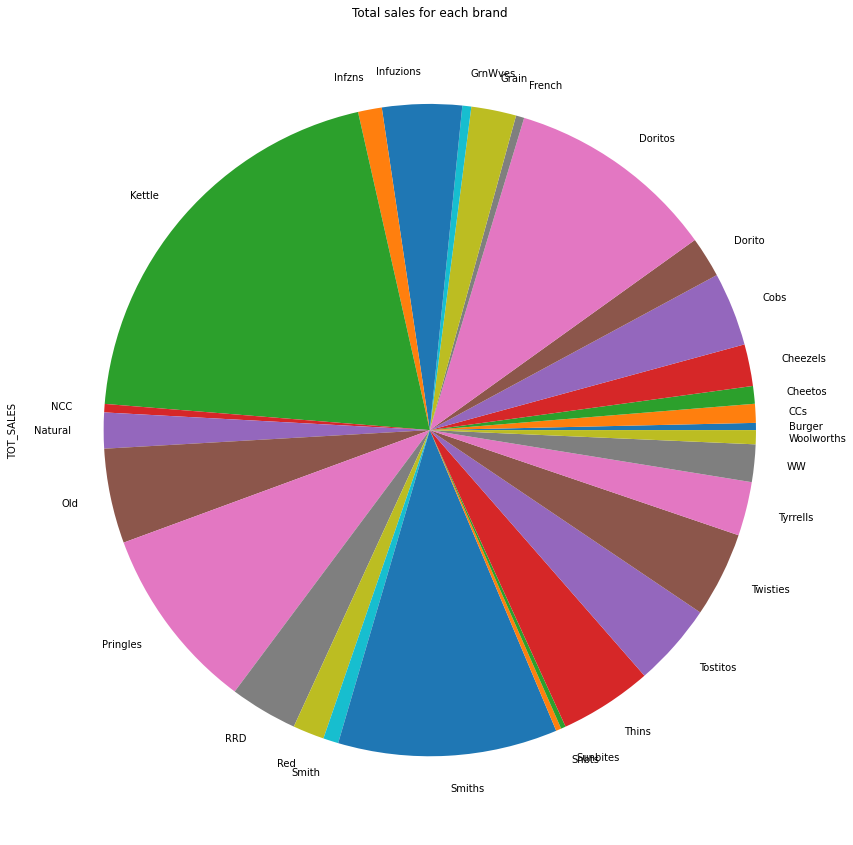

In [37]:
# total sales for each brand
df_all.groupby('BRAND')['TOT_SALES'].sum().plot.pie(figsize=(15,15))
plt.title('Total sales for each brand')
plt.show()

In [38]:
# show the brand list
df_all.groupby('BRAND')['TOT_SALES'].describe()

,count,mean,std,min,25%,50%,75%,max
BRAND,,,,,,,,
Burger,1564.0,4.367647,0.908819,2.30,4.6,4.6,4.6,11.5
CCs,4551.0,3.972512,0.762329,2.10,4.2,4.2,4.2,10.5
Cheetos,2927.0,5.768534,1.259766,2.80,5.6,5.6,6.6,16.5
Cheezels,4603.0,8.696481,3.639998,2.10,4.2,11.4,11.4,28.5
Cobs,9693.0,7.280491,1.225771,3.80,7.6,7.6,7.6,19.0
Dorito,3183.0,12.268929,2.274824,3.25,13.0,13.0,13.0,19.5
Doritos,24962.0,8.073828,2.078699,2.60,7.8,8.8,8.8,28.5
French,1418.0,5.591678,1.065459,3.00,6.0,6.0,6.0,9.0
Grain,6272.0,6.863648,1.179566,3.60,7.2,7.2,7.2,18.0


In [39]:
# merge some brand name variations
df_all.loc[(df_all['BRAND'] == 'Dorito'),'BRAND']='Doritos'
df_all.loc[(df_all['BRAND'] == 'Infzns'),'BRAND']='Infuzions'
df_all.loc[(df_all['BRAND'] == 'Smith'),'BRAND']='Smiths'
df_all.loc[(df_all['BRAND'] == 'WW'),'BRAND']='Woolworths'
df_all.loc[(df_all['BRAND'] == 'GrnWves'),'BRAND']='Grain'
df_all.loc[(df_all['BRAND'] == 'Snbts'),'BRAND']='Sunbites'

In [40]:
# brand list after merge
df_all.groupby('BRAND')['TOT_SALES'].describe()

,count,mean,std,min,25%,50%,75%,max
BRAND,,,,,,,,
Burger,1564.0,4.367647,0.908819,2.3,4.6,4.6,4.6,11.5
CCs,4551.0,3.972512,0.762329,2.1,4.2,4.2,4.2,10.5
Cheetos,2927.0,5.768534,1.259766,2.8,5.6,5.6,6.6,16.5
Cheezels,4603.0,8.696481,3.639998,2.1,4.2,11.4,11.4,28.5
Cobs,9693.0,7.280491,1.225771,3.8,7.6,7.6,7.6,19.0
Doritos,28145.0,8.548264,2.486494,2.6,7.8,8.8,8.8,28.5
French,1418.0,5.591678,1.065459,3.0,6.0,6.0,6.0,9.0
Grain,7740.0,6.668889,1.243037,3.1,6.2,7.2,7.2,18.0
Infuzions,14201.0,6.974692,1.460426,2.4,7.6,7.6,7.6,19.0


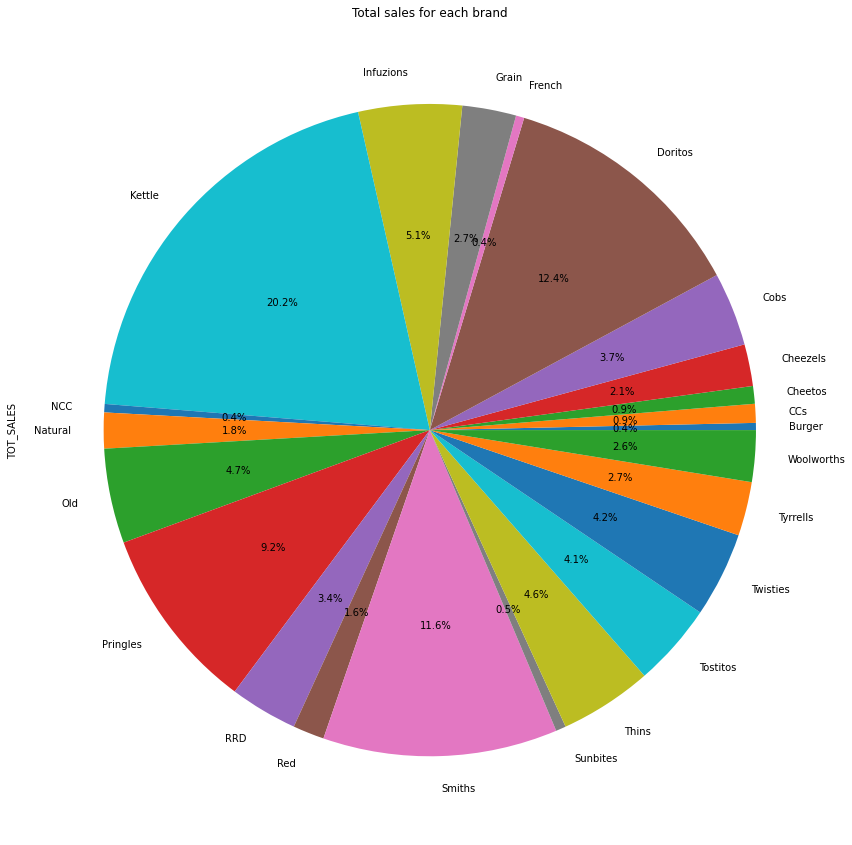

In [41]:
# total sales for each brand
df_all.groupby('BRAND')['TOT_SALES'].sum().plot.pie(figsize=(15,15),autopct='%1.1f%%')
plt.title('Total sales for each brand')
plt.show()

In [45]:
# packet size
df_all['SIZE'] = df_all['PROD_NAME'].str.extract('(\d+)')
df_all

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_CONV,PRICE_EACH,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,3.00,YOUNG SINGLES/COUPLES,Premium,Natural,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,2.10,MIDAGE SINGLES/COUPLES,Budget,CCs,175
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,2018-11-10,1.90,MIDAGE SINGLES/COUPLES,Budget,Woolworths,160
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,2019-03-09,2.10,MIDAGE SINGLES/COUPLES,Budget,CCs,175
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,1.45,MIDAGE SINGLES/COUPLES,Budget,Smiths,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09,5.40,YOUNG SINGLES/COUPLES,Premium,Kettle,175
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13,4.40,YOUNG SINGLES/COUPLES,Premium,Tostitos,175
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06,4.40,YOUNG SINGLES/COUPLES,Premium,Doritos,170
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27,3.90,YOUNG SINGLES/COUPLES,Premium,Doritos,150


In [48]:
df_all['SIZE'].astype(int)

0         175
1         175
2         160
3         175
4         170
         ... 
264829    175
264830    175
264831    170
264832    150
264833    175
Name: SIZE, Length: 264834, dtype: int32

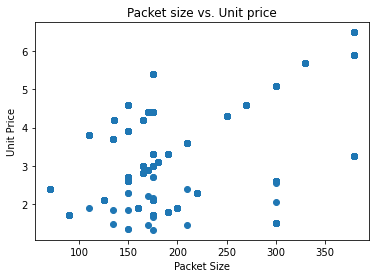

In [54]:
# packet size vs. unit price
plt.scatter(df_all['SIZE'].astype(float),df_all['PRICE_EACH'].astype(float))
plt.xlabel('Packet Size')
plt.ylabel('Unit Price')
plt.title('Packet size vs. Unit price')
plt.show()

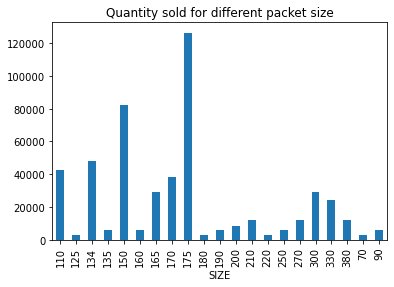

In [61]:
df_all.groupby('SIZE')['PROD_QTY'].sum().plot.bar()
plt.title('Quantity sold for different packet size')
plt.show()